#### Firstly, finding K using Elbow Method

WCSS:  [77.5, 4.0, 2.5, 2.0, 0.5]


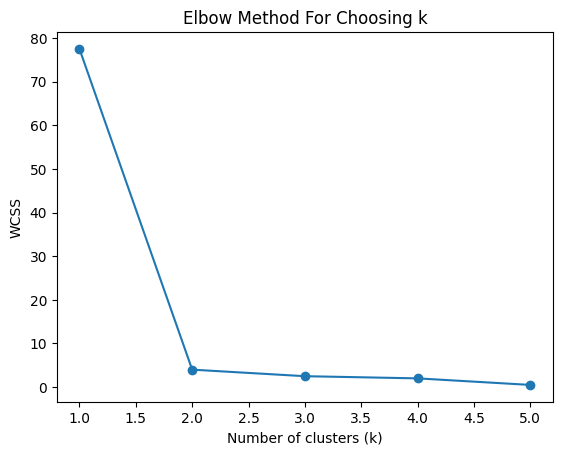

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[1], [2], [3], [8], [9], [10]])
wcss = [] # Sum of Sqaured Errors

for k in range(1, 6):
    km = KMeans(n_clusters=k)
    km.fit(x)
    wcss.append(km.inertia_) 

print("WCSS: ", wcss)
plt.plot(range(1, 6), wcss, marker = 'o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method For Choosing k')
plt.show()

Here, it can be clearly seen that K = 2.

#### K-Means

In [5]:
kmeans = KMeans(n_clusters = 2, random_state = 42)
kmeans.fit(X)

print("Cluter centers (Centroids): ", kmeans.cluster_centers_)
print("Labels: ", kmeans.labels_)

Cluter centers (Centroids):  [[2.]
 [9.]]
Labels:  [0 0 0 1 1 1]


In [14]:
# Inertia
inertia = kmeans.inertia_
print(inertia)

4.0


In [10]:
# Quality of cluster separation
silScore = silhouette_score(X, kmeans.labels_)
print(silScore) # Value nearby to "1" is preferred

0.8065476190476191


In [13]:
# Cluster Sizes
clusterSizes = np.bincount(kmeans.labels_)
print(clusterSizes)

[3 3]
